In [2]:
import skrf as rf

import math
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
import scipy.odr, scipy.special, scipy.stats 
import scipy.signal as signal
import sys

import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (10, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

In [3]:


ntwk = rf.Network('/home/aalmela/Dropbox/EAIII/08-Proyecto/2018/VNA/activos/Measuremets/15V_1IDSS.s2p')
y  = ntwk.y

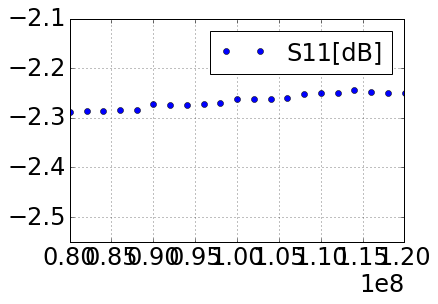

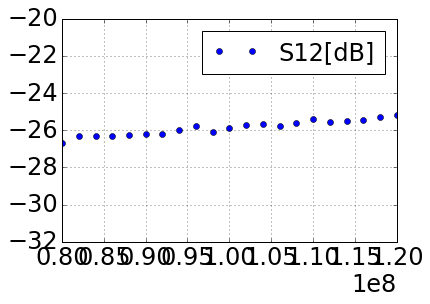

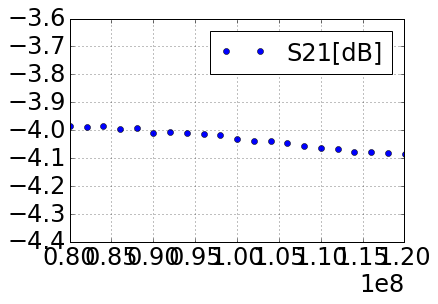

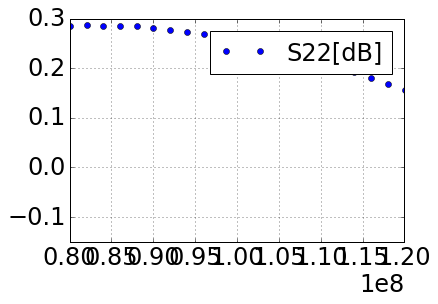

In [4]:
s = ntwk.s
for i,o in zip([0,0,1,1],[0,1,0,1]):
    plt.plot(ntwk.f, 10*np.log10(abs(s[:,i,o])),'o', label = 'S'+str(i+1)+str(o+1)+'[dB]' )
    #plt.plot(ntwk.f, 10*np.log10(s[:,i,o].real),'o', label = 'real'+str(i)+str(o) )
    plt.xlim([80e6, 120e6])
    plt.legend()
    plt.grid()
    plt.show()

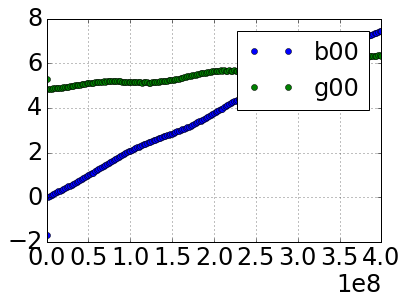

100.0225
0.005158000323
0.00208677841313


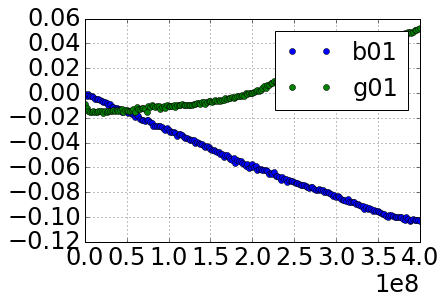

100.0225
-1.06842766458e-05
-3.00201975828e-05


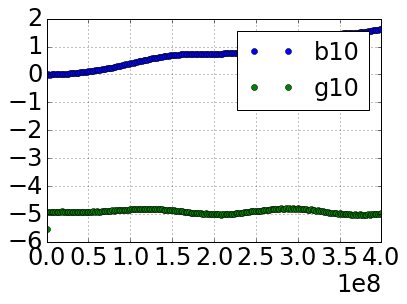

100.0225
-0.00483909200997
0.000396323439721


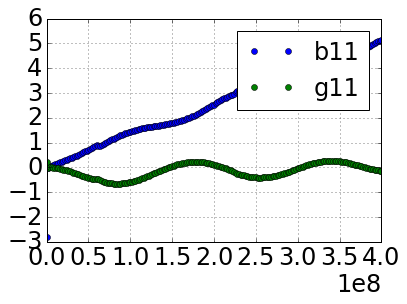

100.0225
-0.000589749435937
0.0014448483053


In [5]:
for i,o in zip([0,0,1,1],[0,1,0,1]):
    plt.plot(ntwk.f, (y[:,i,o].imag)/1e-3,'o', label = 'b'+str(i)+str(o) )
    plt.plot(ntwk.f, y[:,i,o].real/1e-3,'o', label = 'g'+str(i)+str(o) )
    #plt.xlim([10e6, 4000e6])
    #plt.ylim([80e6, 120e6])
    
    plt.legend()
    plt.grid()
    plt.show()
    for n,f in enumerate(ntwk.f):
        if f > 99.9e6 and f < 100.1e6:
            print(f/1e6)
            print(y[n,i,o].real)
            print(y[n,i,o].imag)
        


In [17]:
for i,f in enumerate(ntwk.f): 
    if f not in [10.7e6]: continue
    print('ri=',1/y[i,0,0].real)
    print('ci=',y[i,0,0].imag/(2*np.pi*10.7e6)) 
    
    print('ro=',1/y[i,1,1].real)
    print('co=',y[i,1,1].imag/(2*np.pi*10.7e6)) 
    
    yu = -(y[i,1,0] - y[i,0,0])
    
    print('ri=',1/yu.real)
    print('cu=',yu.imag/(2*np.pi*10.7e6)) 